<h1><center>
    ECE 438: Digital Signal Processing with Applications<br/>
    Lab 13: Image Compression<br/>
    <small>Date:</small><br/>
    <small>Section:</small><br>
</center></h1>

In [ ]:
!pip install PyWavelets

In [49]:
import heapq
import numpy as np
import cv2
from collections import defaultdict
import matplotlib.pyplot as plt
import scipy.fftpack as fftpack

### Coding Redundancy: Huffman Coding


Coding redundancy refers to the representation of image data with more bits than necessary. One of the most efficient techniques to eliminate coding redundancy is Huffman coding. In this exercise, we will implement Huffman encoding and decoding for image pixel values.

Huffman coding is a lossless data compression technique that assigns shorter codes to more frequent symbols. The average code length is minimized by using a variable-length code based on the probability of each symbol in the image.

For each symbol $s_i$ with probability $p_i$, generate a binary tree to create prefix-free binary codes.

#### Exercise 1: Huffman Encoding and Decoding for Images

In this exercise, you will implement Huffman encoding and decoding for the pixel values of a grayscale image. First, calculate the frequency of each pixel value (0-255), then build the Huffman tree, generate the codes, and use them to encode and decode the image.

In [32]:
class HuffmanNode:
    def __init__(self, char, freq):
        self.char = char
        self.freq = freq
        self.left = None
        self.right = None

    def __lt__(self, other):
        return self.freq < other.freq

# Function to build the Huffman tree
def build_huffman_tree(freq_dict):
    heap = []
    for char, freq in freq_dict.items():
        heapq.heappush(heap, HuffmanNode(char, freq))

    while len(heap) > 1:
        left = heapq.heappop(heap)
        right = heapq.heappop(heap)
        
        # Merge nodes
        merged = HuffmanNode(None, left.freq + right.freq)
        merged.left = left
        merged.right = right
        
        heapq.heappush(heap, merged)
    
    return heap[0]

# Function to generate Huffman codes
def generate_huffman_codes(root, code='', code_dict={}):
    if root is not None:
        if root.char is not None:
            code_dict[root.char] = code
        generate_huffman_codes(root.left, code + '0', code_dict)
        generate_huffman_codes(root.right, code + '1', code_dict)
    return code_dict

# Function to encode an image using Huffman codes
def huffman_encode_image(image, codes):
    encoded_image = ""
    for pixel in image.flatten():
        encoded_image += codes[pixel]
    return encoded_image

# Function to decode a Huffman encoded string
def huffman_decode_image(encoded_image, root, shape):
    decoded_image = []
    current_node = root
    for bit in encoded_image:
        if bit == '0':
            current_node = current_node.left
        else:
            current_node = current_node.right
        
        if current_node.left is None and current_node.right is None:
            decoded_image.append(current_node.char)
            current_node = root
    
    return np.array(decoded_image).reshape(shape)


In [34]:
# Load the image
image_path = 'trophozoite.tif'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Calculate pixel frequency
freq_dict = defaultdict(int)
for pixel in image.flatten():
    freq_dict[pixel] += 1
    
# Build Huffman tree and generate codes
root = build_huffman_tree(freq_dict)
codes = generate_huffman_codes(root)

# Encode and decode the image
encoded_image = huffman_encode_image(image, codes)
decoded_image = huffman_decode_image(encoded_image, root, image.shape)

# Calculate original and encoded data size
original_size = len(image.flatten()) * 8  # Original image size in bits
encoded_size = len(encoded_image)  # Encoded size in bits
compression_ratio = original_size / encoded_size

print("Original image and decoded image are equal:", np.array_equal(image, decoded_image))
print(f"Original data size: {original_size} bits")
print(f"Encoded data size: {encoded_size} bits")
print(f"Compression ratio: {compression_ratio:.2f}")

Original image and decoded image are equal: True
Original data size: 6615648 bits
Encoded data size: 6022015 bits
Compression ratio: 1.10


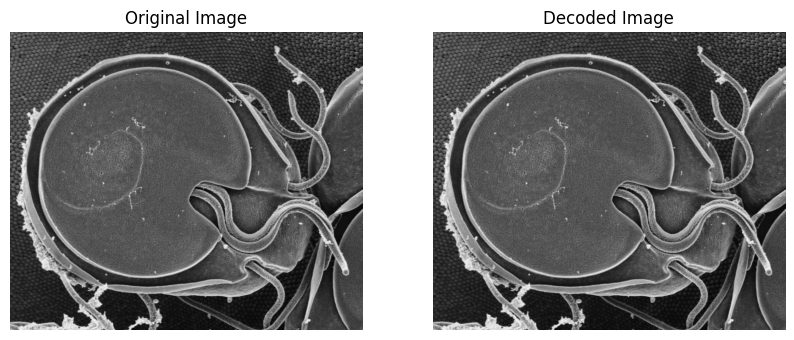

In [35]:
# Display original and decoded images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(decoded_image, cmap='gray')
plt.title('Decoded Image')
plt.axis('off')
plt.show()

predictive_coding

In [43]:
# Function for predictive coding
def predictive_coding(image):
    height, width = image.shape
    residual = np.zeros_like(image)
    
    # Student task: Implement predictive coding
    for i in range(height):
        for j in range(1, width):
            # Use the left pixel to predict the current pixel value
            predicted_value = image[i, j-1]
            residual[i, j] = image[i, j] - predicted_value
    
    return residual



/tmp/ipykernel_3853901/4288553779.py:11: RuntimeWarning: overflow encountered in scalar subtract
  residual[i, j] = image[i, j] - predicted_value


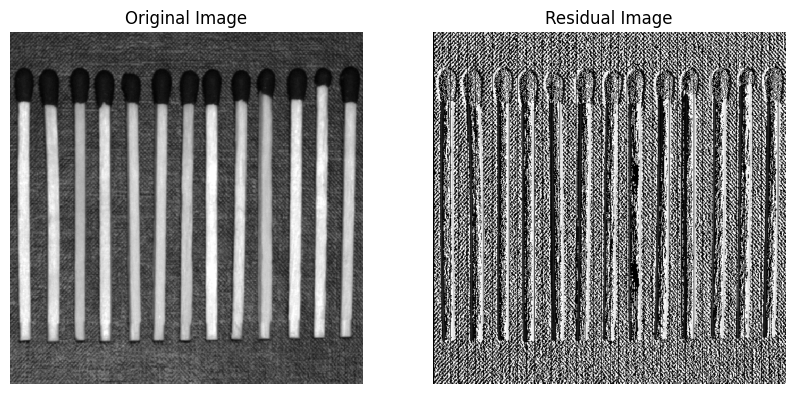

In [44]:
# Load the image
image_path = 'matches-aligned.tif'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply predictive coding
residual = predictive_coding(image)
# Display original and residual images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(residual, cmap='gray')
plt.title('Residual Image')
plt.axis('off')
plt.show()

In [45]:
freq_dict_original = defaultdict(int)
for pixel in image.flatten():
    freq_dict_original[pixel] += 1

root_original = build_huffman_tree(freq_dict_original)
codes_original = generate_huffman_codes(root_original)

encoded_original_image = huffman_encode_image(image, codes_original)
encoded_original_size = len(encoded_original_image)  # Encoded size in bits
compression_ratio_original = original_size / encoded_original_size
print(f"Compression ratio after Huffman encoding of original image: {compression_ratio_original:.2f}")

freq_dict_residual = defaultdict(int)
for pixel in residual.flatten():
    freq_dict_residual[pixel] += 1
root_residual = build_huffman_tree(freq_dict_residual)
codes_residual = generate_huffman_codes(root_residual)

encoded_residual_image = huffman_encode_image(residual, codes_residual)
encoded_residual_size = len(encoded_residual_image)  # Encoded size in bits
compression_ratio_residual = original_size / encoded_residual_size
print(f"Compression ratio after Huffman encoding of residual image: {compression_ratio_residual:.2f}")

Compression ratio after Huffman encoding of original image: 2.49
Compression ratio after Huffman encoding of residual image: 3.16


Exercise 3: Quantization Compression

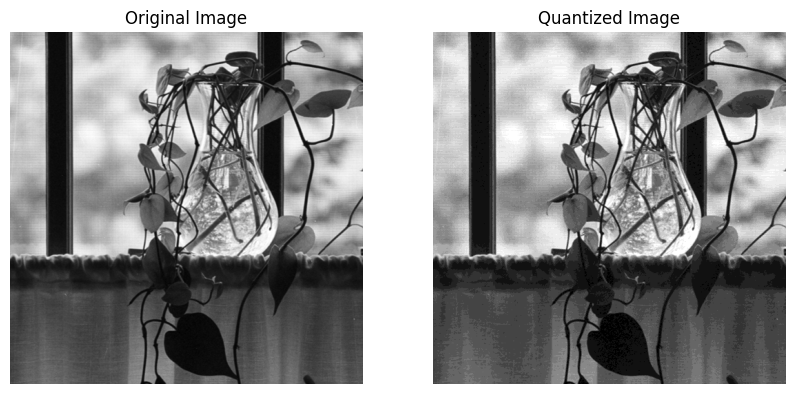

In [47]:
# Function for quantization
def quantize(image, quantization_level):
    # Apply quantization to reduce image precision
    quantized_image = (image // quantization_level) * quantization_level
    return quantized_image

# Function to calculate RMSE
def calculate_rmse(original, compressed):
    return np.sqrt(np.mean((original - compressed) ** 2))

# Load the image
image_path = 'vase.tif'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply quantization
quantization_level = 16  # Adjust the quantization level to observe different effects
quantized_image = quantize(image, quantization_level)

# Display original and quantized images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(quantized_image, cmap='gray')
plt.title('Quantized Image')
plt.axis('off')
plt.show()


In [48]:
# Calculate RMSE
rmse_value = calculate_rmse(image, quantized_image)
print(f'RMSE after quantization: {rmse_value:.2f}')

# Calculate compression ratio
original_size = image.size * 8  # Size in bits (each pixel is 8 bits)
quantized_size = original_size // quantization_level  # Approximate size reduction
compression_ratio = original_size / quantized_size
print(f'Compression ratio after quantization: {compression_ratio:.2f}')


RMSE after quantization: 8.65
Compression ratio after quantization: 16.00


JPEG

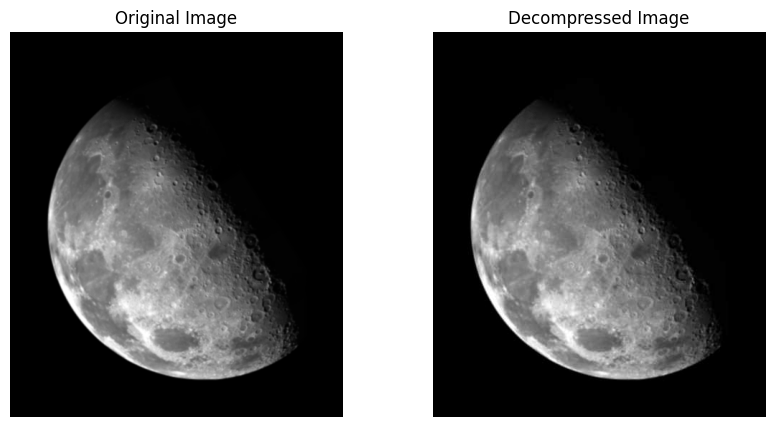

In [18]:
# Function for 8x8 DCT transformation
def dct_8x8(block):
    return fftpack.dct(fftpack.dct(block.T, norm='ortho').T, norm='ortho')

# Function for 8x8 IDCT transformation
def idct_8x8(block):
    return fftpack.idct(fftpack.idct(block.T, norm='ortho').T, norm='ortho')

# Function to perform JPEG compression with padding
def jpeg_compress(image, quantization_matrix):
    # Pad the image to ensure its dimensions are multiples of 8
    height, width = image.shape
    pad_height = (8 - (height % 8)) % 8
    pad_width = (8 - (width % 8)) % 8
    padded_image = np.pad(image, ((0, pad_height), (0, pad_width)), mode='constant', constant_values=0)

    compressed_image = np.zeros_like(padded_image, dtype=np.float32)
    
    # Divide the image into 8x8 blocks and apply DCT + quantization
    for i in range(0, padded_image.shape[0], 8):
        for j in range(0, padded_image.shape[1], 8):
            block = padded_image[i:i+8, j:j+8]
            dct_block = dct_8x8(block)
            quantized_block = np.round(dct_block / quantization_matrix)
            compressed_image[i:i+8, j:j+8] = quantized_block
            
    return compressed_image, padded_image.shape

# Function to perform JPEG decompression
def jpeg_decompress(compressed_image, quantization_matrix, original_shape):
    decompressed_image = np.zeros_like(compressed_image, dtype=np.float32)
    
    # Divide the compressed image into 8x8 blocks and apply IDCT
    for i in range(0, compressed_image.shape[0], 8):
        for j in range(0, compressed_image.shape[1], 8):
            block = compressed_image[i:i+8, j:j+8]
            dequantized_block = block * quantization_matrix
            idct_block = idct_8x8(dequantized_block)
            decompressed_image[i:i+8, j:j+8] = idct_block
            
    # Clip the image to the original shape
    decompressed_image = decompressed_image[:original_shape[0], :original_shape[1]]
    return np.clip(decompressed_image, 0, 255).astype(np.uint8)

# Load the image
image_path = 'moon.tif'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Define quantization matrix
quantization_matrix = np.array([[16, 11, 10, 16, 24, 40, 51, 61],
                                [12, 12, 14, 19, 26, 58, 60, 55],
                                [14, 13, 16, 24, 40, 57, 69, 56],
                                [14, 17, 22, 29, 51, 87, 80, 62],
                                [18, 22, 37, 56, 68, 109, 103, 77],
                                [24, 35, 55, 64, 81, 104, 113, 92],
                                [49, 64, 78, 87, 103, 121, 120, 101],
                                [72, 92, 95, 98, 112, 100, 103, 99]])

# Perform JPEG compression and decompression
compressed_image, padded_shape = jpeg_compress(image, quantization_matrix)
decompressed_image = jpeg_decompress(compressed_image, quantization_matrix, image.shape)

# Display original and decompressed images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(decompressed_image, cmap='gray')
plt.title('Decompressed Image')
plt.axis('off')
plt.show()


In [19]:
# Calculate RMSE
rmse_value = np.sqrt(np.mean((image - decompressed_image) ** 2))
print(f'RMSE after JPEG compression: {rmse_value:.2f}')

# Calculate compression ratio
original_size = image.size * 8  # Size in bits
compressed_size = compressed_image.size * 8 / np.mean(quantization_matrix)  # Approximate compressed size
compression_ratio = original_size / compressed_size
print(f'Compression ratio after JPEG compression: {compression_ratio:.2f}')

RMSE after JPEG compression: 2.03
Compression ratio after JPEG compression: 56.99


JEPG 2000

Quality level: 1, RMSE after JPEG 2000 compression: 8.84


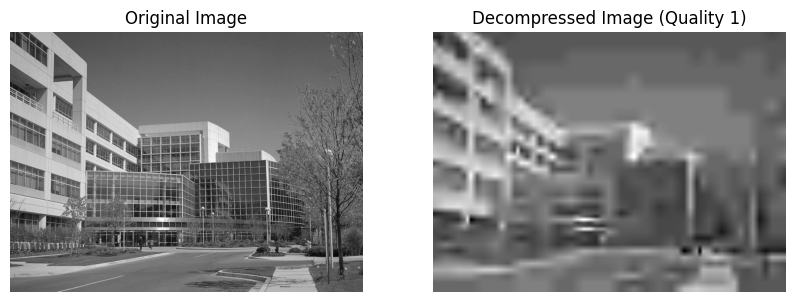

Quality level: 10, RMSE after JPEG 2000 compression: 7.70


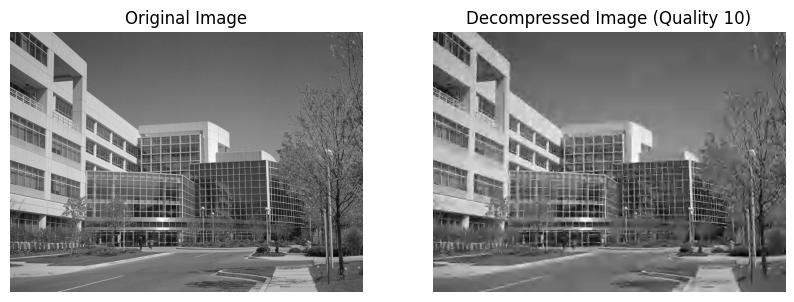

Quality level: 100, RMSE after JPEG 2000 compression: 5.19


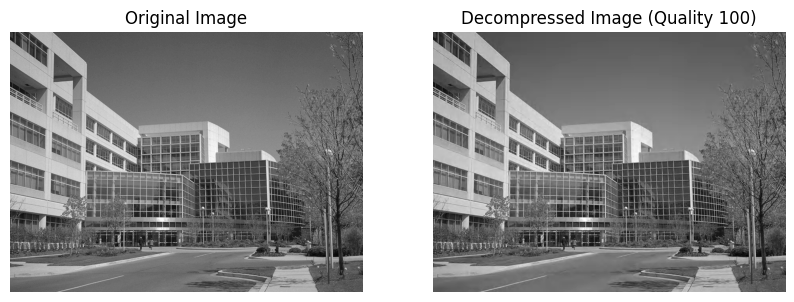

Quality level: 1000, RMSE after JPEG 2000 compression: 0.00


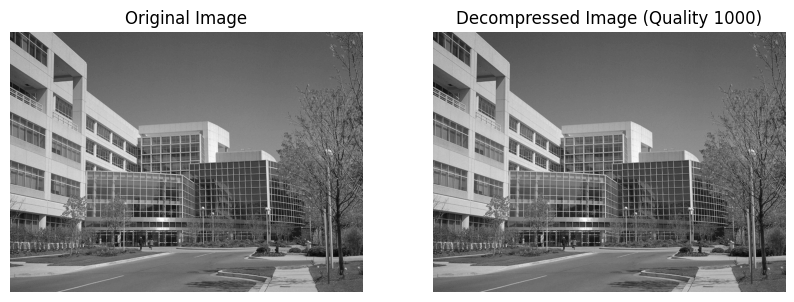

In [50]:
image_path = 'national-archives-bld.tif'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Quality levels for JPEG 2000 compression
quality_levels = [1, 10, 100, 1000]

# Loop through each quality level and perform JPEG 2000 compression
for quality in quality_levels:
    # Save the image in JPEG 2000 format with the specified quality level
    compressed_image_path = f'compressed_image_{quality}.jp2'
    cv2.imwrite(compressed_image_path, image, [cv2.IMWRITE_JPEG2000_COMPRESSION_X1000, quality])

    # Load the compressed image
    decompressed_image = cv2.imread(compressed_image_path, cv2.IMREAD_GRAYSCALE)

    # Calculate RMSE
    rmse_value = np.sqrt(np.mean((image - decompressed_image) ** 2))
    print(f'Quality level: {quality}, RMSE after JPEG 2000 compression: {rmse_value:.2f}')

    # Display original and decompressed images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(decompressed_image, cmap='gray')
    plt.title(f'Decompressed Image (Quality {quality})')
    plt.axis('off')
    plt.show()
